[View in Colaboratory](https://colab.research.google.com/github/juzkev/HDB-Resale-Prices/blob/master/HDB_Resale_Prices.ipynb)

# Predicting HDB Resale prices

In [2]:
!pip install requests

import requests
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.DataFrame()

rids = ['1b702208-44bf-4829-b620-4615ee19b57c', '83b2fc37-ce8c-4df4-968b-370fd818138b', '8c00bf08-9124-479e-aeca-7cc411d884c4', 'adbbddd3-30e2-445f-a123-29bee150a6fe']
url = 'https://data.gov.sg/api/action/datastore_search'

for rid in rids[0:1]:
  print('Downloading from rid {}'.format(rid))
  params = params={
      'resource_id': rid, 
       'limit': 500000,
  }

  with requests.get(url, params=params) as r:
    df = pd.concat([df,pd.DataFrame(r.json()['result']['records'])])  
    type_dict = ({field['id']: field['type'] for field in r.json()['result']['fields']})

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple


In [0]:
# Setting column dtype
for col in ('floor_area_sqm', 'remaining_lease', 'resale_price'):
    df[col] = pd.to_numeric(df[col])
df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date']).dt.floor('d')
df['month'] = pd.to_datetime(df['month']).dt.floor('d')
df.drop(columns='_id', inplace=True, errors='ignore')

In [3]:
df.infer_objects().info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59809 entries, 0 to 59808
Data columns (total 11 columns):
block                  59809 non-null object
flat_model             59809 non-null object
flat_type              59809 non-null object
floor_area_sqm         59809 non-null float64
lease_commence_date    59809 non-null datetime64[ns]
month                  59809 non-null datetime64[ns]
remaining_lease        59809 non-null int64
resale_price           59809 non-null float64
storey_range           59809 non-null object
street_name            59809 non-null object
town                   59809 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 5.0+ MB


,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
count,59809,59809,59809,59809.000000,59809,59809,59809.000000,5.980900e+04,59809,59809,59809
unique,2186,20,7,NaN,50,38,NaN,NaN,17,524,26
top,2,Model A,4 ROOM,NaN,1985-01-01 00:00:00,2017-11-01 00:00:00,NaN,NaN,04 TO 06,YISHUN RING RD,JURONG WEST
freq,241,18042,24628,NaN,4175,1975,NaN,NaN,14195,984,4668
first,NaN,NaN,NaN,NaN,1966-01-01 00:00:00,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2015-01-01 00:00:00,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,97.319194,NaN,NaN,74.017890,4.394339e+05,NaN,NaN,NaN
std,NaN,NaN,NaN,24.166368,NaN,NaN,11.274598,1.415803e+05,NaN,NaN,NaN
min,NaN,NaN,NaN,31.000000,NaN,NaN,47.000000,9.050000e+04,NaN,NaN,NaN
25%,NaN,NaN,NaN,75.000000,NaN,NaN,66.000000,3.400000e+05,NaN,NaN,NaN


In [4]:
df.sample(10)

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
41861,117,Model A,4 ROOM,104.0,1984-01-01,2017-04-01,66,710000.0,07 TO 09,CLEMENTI ST 13,CLEMENTI
56209,149,New Generation,3 ROOM,67.0,1982-01-01,2017-12-01,64,363888.0,07 TO 09,SILAT AVE,BUKIT MERAH
47481,960,Apartment,EXECUTIVE,137.0,1999-01-01,2017-07-01,81,570000.0,04 TO 06,HOUGANG AVE 9,HOUGANG
28424,353C,Improved,5 ROOM,110.0,2002-01-01,2016-07-01,84,380000.0,01 TO 03,ADMIRALTY DR,SEMBAWANG
8790,532,New Generation,3 ROOM,82.0,1980-01-01,2015-07-01,63,320000.0,07 TO 09,BEDOK NTH ST 3,BEDOK
58534,361,Apartment,EXECUTIVE,146.0,1996-01-01,2018-01-01,77,628000.0,10 TO 12,WOODLANDS AVE 5,WOODLANDS
10884,987B,Premium Apartment,5 ROOM,110.0,2008-01-01,2015-08-01,92,370000.0,01 TO 03,JURONG WEST ST 93,JURONG WEST
11095,161B,Premium Apartment,5 ROOM,114.0,2004-01-01,2015-08-01,87,522500.0,16 TO 18,PUNGGOL CTRL,PUNGGOL
18281,167,Model A,4 ROOM,100.0,1997-01-01,2016-01-01,80,383000.0,01 TO 03,HOUGANG AVE 1,HOUGANG
24768,773,Model A,4 ROOM,107.0,1996-01-01,2016-05-01,79,415000.0,07 TO 09,PASIR RIS ST 71,PASIR RIS


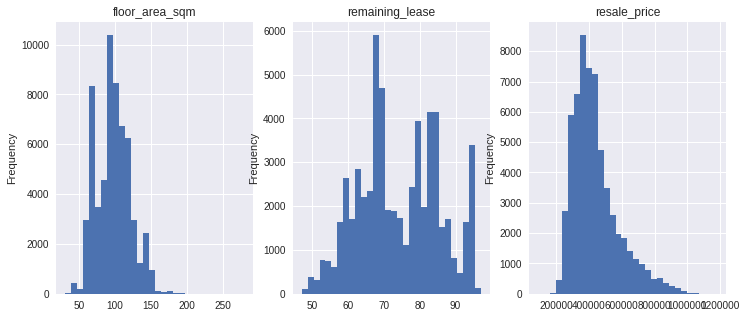

In [13]:
fig, ax = plt.subplots(1,3, figsize=(12,5))
for i, col in enumerate(df.select_dtypes(include=[np.number])):
  df[col].plot.hist(subplots=True, ax=ax[i], bins=30)
  ax[i].set_title(col)

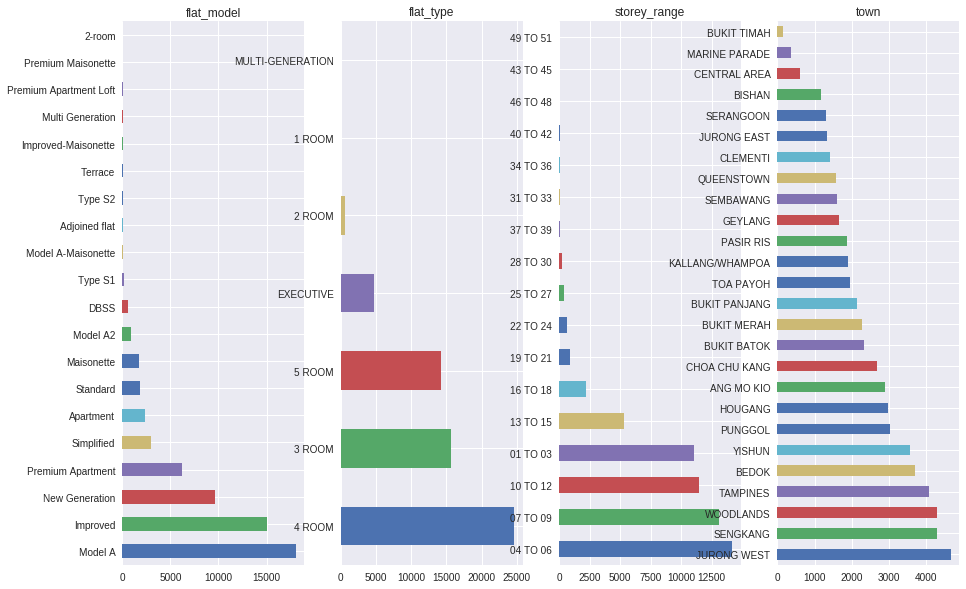

In [19]:
cat_cols = ['flat_model', 'flat_type', 'storey_range', 'town']
fig, ax = plt.subplots(1,len(cat_cols), figsize=(15,10))
for i, col in enumerate(cat_cols):
  if(df[col].nunique() < 30):
    df[col].value_counts().plot.barh(subplots=True, ax=ax[i])

Data looks pretty unbalanced for cetain categorical values.